# Telco Churn Classification Project

## Overview

## Data Exploration

In [161]:
import numpy as np
import pandas as pd
import seaborn as sns

In [125]:
# Load data
df = pd.read_excel('data/churn.xlsx')

In [126]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [128]:
# Get correlation of churn value with other values
df.corr(numeric_only=True).loc['Churn Value'].drop('Churn Value').sort_values()

Tenure Months     -0.352229
CLTV              -0.127463
Latitude          -0.003384
Zip Code           0.003346
Longitude          0.004594
Monthly Charges    0.193356
Churn Score        0.664897
Count                   NaN
Name: Churn Value, dtype: float64

In [129]:
# Print rows with null values
df[df.isna().any(axis=1)]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,27,3964,NaN
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,...,One year,No,Mailed check,56.95,1889.5,No,0,61,3441,NaN
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,66,4307,NaN
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,...,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,43,4459,NaN
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,...,Month-to-month,No,Mailed check,29.75,301.9,No,0,51,2013,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [130]:
# Show different churn reasons
df['Churn Reason'].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [131]:
df['Country'].unique()

array(['United States'], dtype=object)

In [132]:
df['State'].unique()

array(['California'], dtype=object)

## Data Cleaning

**Drop redundant columns**

Count: we can count the rows without that extra column

Country: all USA

State: all California

Lat Long, latitude and longitude: we have other data for the location, correlation is very low

Churn label: we have the churn value

City: we have the zicode

In [135]:
df = df.drop(['Count', 'Country', 'State', 'City', 'Lat Long', 'Latitude', 'Longitude', 'Churn Label'], axis=1)

In [136]:
# Convert total charges to float
df['Total Charges'].value_counts()

Total Charges
          11
20.2      11
19.75      9
19.65      8
19.9       8
          ..
1419.4     1
1990.5     1
7362.9     1
346.45     1
820.5      1
Name: count, Length: 6531, dtype: int64

In [137]:
# Some charges are not numbers
not_numbers_mask = df['Total Charges'].str.contains(r'(\d+(?:\.\d+)?)', regex=True) == False
df[not_numbers_mask]

/var/folders/_f/65hyqq653ws_7lpphp7nvxd80000gn/T/ipykernel_4236/3852536273.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  not_numbers_mask = df['Total Charges'].str.contains(r'(\d+(?:\.\d+)?)', regex=True) == False


,CustomerID,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,92408,Female,No,Yes,No,0,No,No phone service,DSL,...,No,Two year,Yes,Bank transfer (automatic),52.55,,0,36,2578,NaN
2438,3115-CZMZD,93526,Male,No,No,No,0,Yes,No,No,...,No internet service,Two year,No,Mailed check,20.25,,0,68,5504,NaN
2568,5709-LVOEQ,94401,Female,No,Yes,No,0,Yes,No,DSL,...,Yes,Two year,No,Mailed check,80.85,,0,45,2048,NaN
2667,4367-NUYAO,95014,Male,No,Yes,Yes,0,Yes,Yes,No,...,No internet service,Two year,No,Mailed check,25.75,,0,48,4950,NaN
2856,1371-DWPAZ,95569,Female,No,Yes,No,0,No,No phone service,DSL,...,No,Two year,No,Credit card (automatic),56.05,,0,30,4740,NaN
4331,7644-OMVMY,90029,Male,No,Yes,Yes,0,Yes,No,No,...,No internet service,Two year,No,Mailed check,19.85,,0,53,2019,NaN
4687,3213-VVOLG,92585,Male,No,Yes,Yes,0,Yes,Yes,No,...,No internet service,Two year,No,Mailed check,25.35,,0,49,2299,NaN
5104,2520-SGTTA,95005,Female,No,Yes,Yes,0,Yes,No,No,...,No internet service,Two year,No,Mailed check,20.00,,0,27,3763,NaN
5719,2923-ARZLG,91750,Male,No,Yes,Yes,0,Yes,No,No,...,No internet service,One year,Yes,Mailed check,19.70,,0,69,4890,NaN
6772,4075-WKNIU,90201,Female,No,Yes,Yes,0,Yes,Yes,DSL,...,No,Two year,No,Mailed check,73.35,,0,44,2342,NaN


In [138]:
# Replace rows with mean and convert to string
mean = df[~not_numbers_mask]['Total Charges'].astype('float').mean()
mean_str = str(round(mean, 2))

df['Total Charges'] = df['Total Charges'].replace(' ', mean_str)
df['Total Charges'] = df['Total Charges'].astype('float')
assert df['Total Charges'].dtype == 'float'

In [139]:
df['Total Charges']

0        108.15
1        151.65
2        820.50
3       3046.05
4       5036.30
         ...   
7038    1419.40
7039    1990.50
7040    7362.90
7041     346.45
7042    6844.50
Name: Total Charges, Length: 7043, dtype: float64

## Data Analysis (EDA)

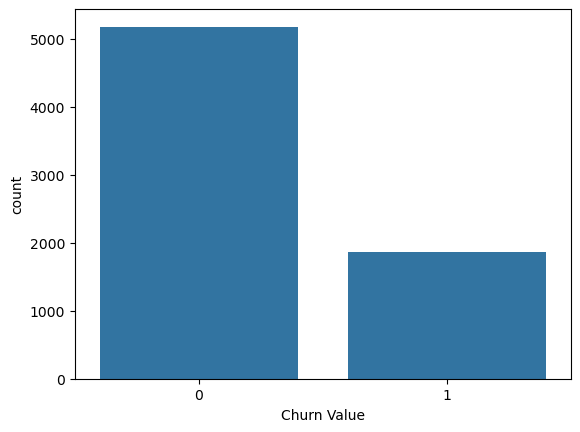

In [155]:
# Countplot
sns.countplot(data=df, x='Churn Value');

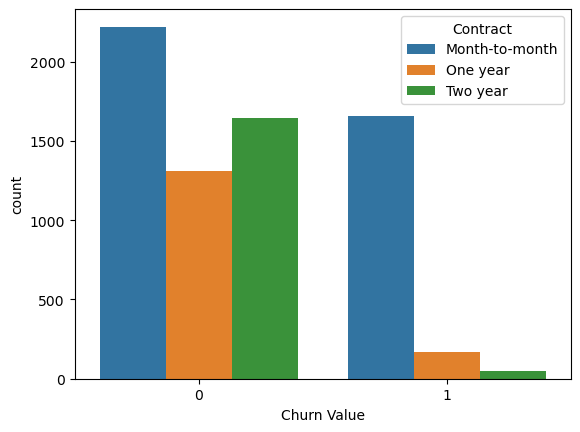

In [157]:
# Countplot contract type
sns.countplot(data=df, x='Churn Value', hue='Contract');

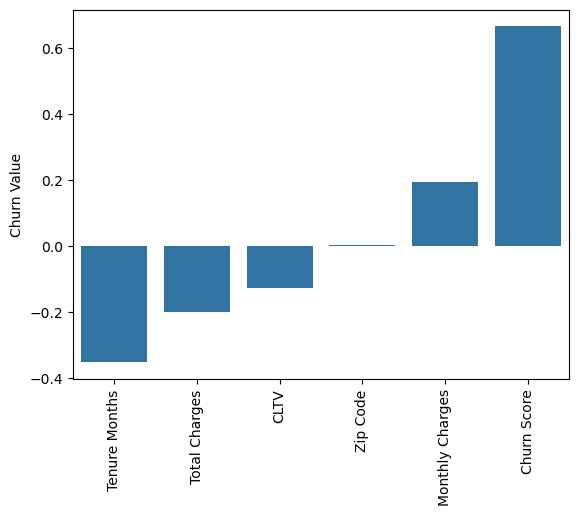

In [159]:
# Correlation barplot
correlations = df.corr(numeric_only=True).loc['Churn Value'].drop('Churn Value').sort_values()
ax = sns.barplot(data=correlations)
ax.tick_params(axis='x', rotation=90);

/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


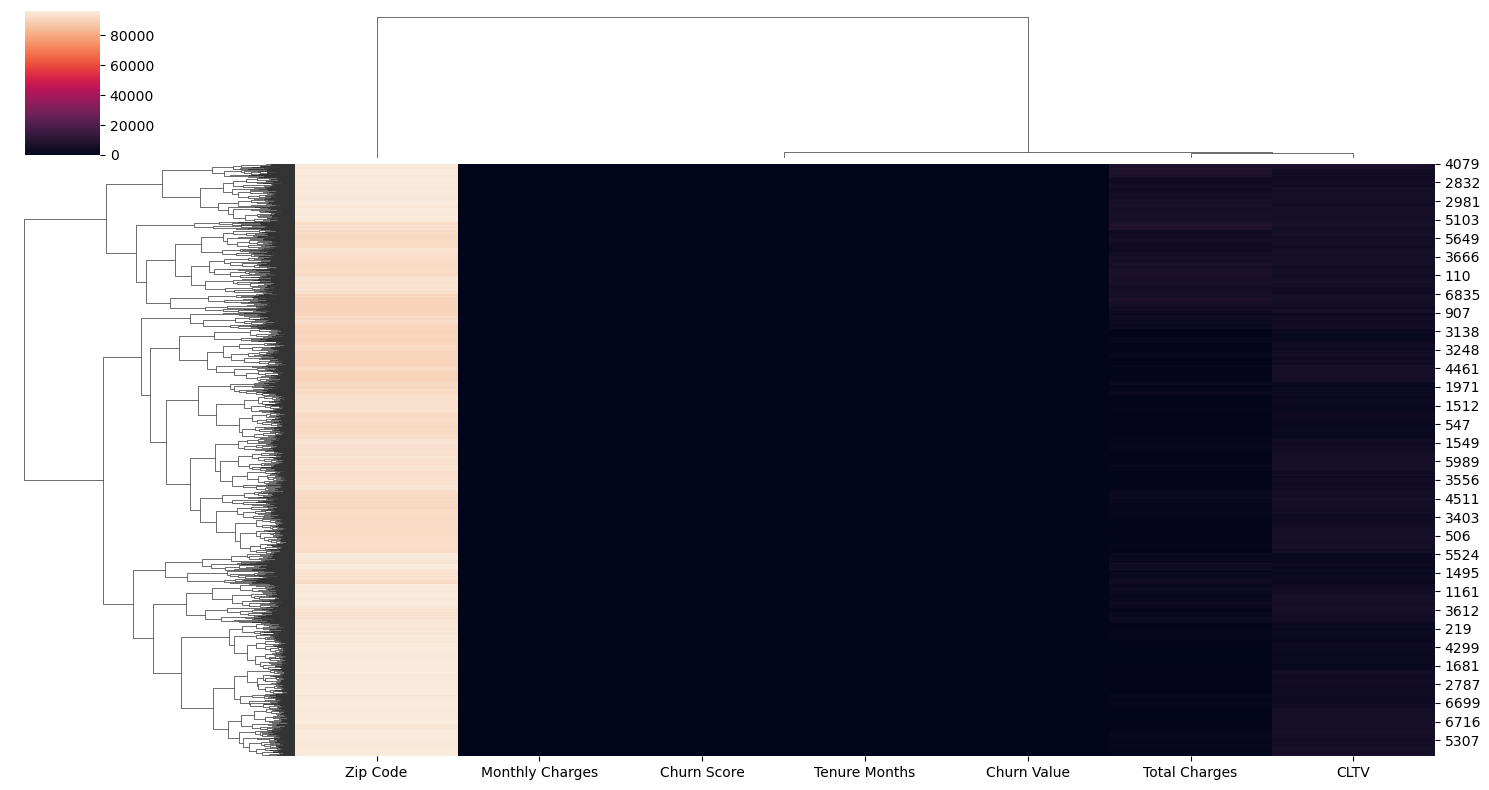

In [167]:
# Clustermap
sns.clustermap(df.select_dtypes(include=np.number), figsize=(15,8));

## Data Preparation for Modeling

## Data Modeling

### KNN

### SVM

### Logistic

### Final Model

#### Make predictions

## End